In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
G = nx.karate_club_graph()

In [8]:
import Tr_centrality_measure
import Graph_Entropy_measure
import Selection_Algorithm
import Constraint_Coefficient
#N1=(PI/SUM(PI,TC,CC))
#N2=(TC/SUM(PI,TC,CC))
#N3=(CC/SUM(PI,TC,CC))
#TPN=N1*(PI_i)+N1*(TC_i)+N1*(CC_i)
i=0
def TPN(i):
    PI_i = Graph_Entropy_measure.PI_of(i)
    TC_i = Tr_centrality_measure.TC_of(i)
    CC_i = Constraint_Coefficient.CC_of(i)
    #CC_i=
    N1=PI_i/(PI_i+TC_i+CC_i)
    N2=TC_i/(PI_i+TC_i+CC_i)
    N3=CC_i/(PI_i+TC_i+CC_i)
    
    TPN_i = (PI_i + TC_i + CC_i)/3
    
    return TPN_i

In [9]:
#loop
def loop_TPN():
    i=1
    list_TPN=[]    
    for i in Selection_Algorithm.sel_subgraphs():          
        TPN_ = TPN(i)
        i+=1
        i_TPN = [i, TPN_]
        list_TPN.append(i_TPN)  
            
    return  list_TPN

In [10]:
def TPN_Ranking( val ):
      return val [1]

TPN_Rank = loop_TPN()
TPN_Rank.sort(key=lambda elem: elem[1])

TPN_Rank

[[34, 0.23832061409823813],
 [33, 0.3209470418533061],
 [32, 0.3299469161877435],
 [1, 0.38441943597535966],
 [31, 0.3853379731097799],
 [24, 0.3984888390992391],
 [5, 0.41989465151286726],
 [11, 0.41989465151286726],
 [30, 0.44635059899927754],
 [2, 0.4644091355053515],
 [6, 0.46858984948938237],
 [7, 0.46858984948938237],
 [9, 0.4752736144878779],
 [14, 0.4774799044745408],
 [3, 0.48439421140741984],
 [8, 0.5172719617662075],
 [4, 0.5250177529841378]]

In [6]:
def sel_subgraphs():
    sel_subgraphs = []
    sel_subgraph = G.subgraph(Selection_Algorithm.nodes_in_triangle(G, 0))
    for i in sel_subgraph:                   
            row = i        
            sel_subgraphs.append(row)
            my_sel_subgraphs = tuple(sel_subgraphs)
   
    
sel_subgraphs()

E:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


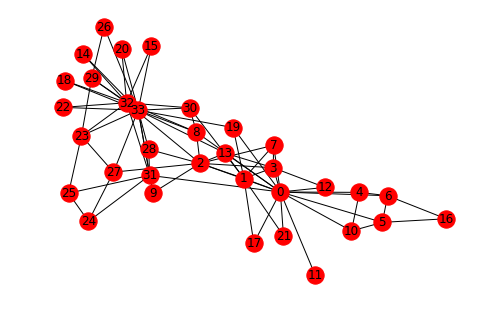

<Figure size 432x288 with 0 Axes>

In [7]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
nx.draw(G, with_labels = True)
plt.show()
plt.savefig("out.png")